# EDA com o dataset ***State of Data Brazil 2021***
Let's Code 850 / Python e Dados  
Projeto do Módulo IV - Técnicas de Programação II

### Equipe
* Carolina Sousa Cecilio Vieira
* Farley Salomão Filho
* José Rafael Souza do Nascimento
* Rodrigo Minoru Hayakawa Tanaka

## Sobre o dataset
***State of Data Brazil*** foi uma iniciativa realizada pela comunidade Data Hackers, com o objetivo de entender o panomara do mercado de trabalho brasileiro na área de dados ([*hotsite*](https://www.stateofdata.com.br/) e [*link* do dataset no Kaggle](https://www.kaggle.com/datasets/datahackers/state-of-data-2021)).
A coleta dos dados foi realizada no período de 18 de outubro de 2021 e 6 de dezembro de 2021, por meio de um questionário *online*, reunindo indicadores relacionados a perfil demográfico, formação, atuação no setor, remuneração, rotatividade e fatores de satisfação no ambiente de trabalho, incluindo o impacto do trabalho remoto nas preferências profissionais de 2.645 respondentes de todo o Brasil.


O dataset disponibilizado consiste de um arquivo formato .csv com 2645 linhas e 356 colunas. Dessas colunas, algumas se referem às diferentes respostas de uma mesma pergunta, nos casos em que esta admite respostas multi-valoradas.

O questionário foi dividido em 9 partes temáticas:
* Parte 1 - Dados demográficos
* Parte 2 - Dados sobre carreira
* Parte 3 - Desafios dos gestores de times de dados
* Parte 4 - Conhecimentos na área de dados
* Parte 5 - Objetivos na área de dados
* Parte 6 - Conhecimentos em Engenharia de Dados/DE
* Parte 7 - Conhecimentos em Análise de Dados/DA
* Parte 8 - Conhecimentos em Ciências de Dados/DS
* Parte 9 - Sobre a comunidade **Data Hackers**

### Temas selecionados para este projeto
01. Caracterização do profissional de dados (perfil demográfico, idade, gênero, Estado/Região e instrução)
02. Caracterização do trabalho do profissional de dados (indústria de atuação, vínculos empregatícios, níveis de senioridade, regime de trabalho, atividades, linguagens de programação)
03. Perfil salarial do profissional de dados (faixas salariais e relações com variáveis como profissão, gênero e senioriade)

### Observações quanto aos dados utilizados
- **Limitações da validação estatística da pesquisa** A coleta de dados foi feita por meio de questionários de internet, sendo que os autores e responsáveis pelo *dataset* não explicitam, seja no *site* ou no [relatório de divulgação da iniciativa](https://www.stateofdata.com.br/_files/ugd/e99c65_97b434ed9f1b40bdb3312fccc8cb8bd7.pdf), maiores esclarecimentos quanto a cuidados de coleta e amostragem que permitam, com algum rigor estatístico, afirmar que o conjunto de respondentes configure uma amostra representiva do mercado de profissionais em estudo. Por esse motivo, neste projeto de EDA, é necessário ressaltar que as observações realizadas na interpretação dos dados se dirigem ao conjunto de respondentes, e como precaução deve-se afastar generalizações a respeito do mercado profissional.
- **O *dataset* quase não apresenta variáveis quantitativas** A única variável quantitativa do *dataset* é a idade, dessa forma a dificuldade inicial na elaboração de gráficos de cruzamento de variáveis quantitativas teve de ser superada com a utilização de variáveis categóricas.

### *Missing values* e tratamentos necessários
- **O dataset em geral não apresenta inconsistências nos dados**. Isso reduz a necessidade de limpeza e facilita a manipulação.
- **Os nomes das colunas são longos**. No dataset original, os nomes das colunas são compostos de tuplas com dois elementos, o primeiro correspondendo a um código de identificação da coluna e, o segundo, a sua descrição detalhada. Tendo em vista que manipular o data frame com nomes de colunas extensos pode se tornar bastante trabalhoso, é interessante renomear as colunas com apenas o primeiro item da tupla. 
- **A tabela apresenta muitos `NA` values**. Tais `NA` values são de duas origens principais: (i) itens do questionário os quais o respondente não preencheu deliberadamente ou por engano e (ii) seções do questionário que especificamente não eram de preenchimento do respondente. Nesse segundo quesito, ressalte-se que as Partes 6, 7 e 8 correspondem respectivamente a conhecimentos das áreas de Engenharia de Dados, Análise de Dados e Ciência de Dados, devendo o respondente preencher apenas uma delas. 
- Principais tratamentos de dados utilizados nesta EDA:
    - Exclusão de `NA`s `.dropna()`;
    - Substituição de valores `.replace()`;
    - Ordenação de variáveis categóricas `pd.Categorical()`;
    - Criação de colunas auxiliares no DF original (`.apply()`);
    - Geração de tabelas auxiliares de análise (`.pivot_table()` e `.crosstab()`).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import product
import plotly.io as pio
pio.templates.default = "plotly"
%matplotlib inline

In [2]:
df = pd.read_csv('./data/State of Data 2021 - Dataset - Pgina1.csv')

<ipython-input-2-6de894b5cf24>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/State of Data 2021 - Dataset - Pgina1.csv')


In [3]:
# Tratamento dos dados
#Valores Nan em nível de ensino
df["('P1_h ', 'Nivel de Ensino')"] = df["('P1_h ', 'Nivel de Ensino')"].replace({'Prefiro não informar': None})
#Ajustando coluna de experiência
experience = ['Não tenho experiência na área de dados',
'Menos de 1 ano',
'de 1 a 2 anos',
'de 2 a 3 anos',
'de 4 a 5 anos',
'de 6 a 10 anos',
'Mais de 10 anos']
df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"] = pd.Categorical(df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"], ordered=True, categories=experience)
#Ajustando coluna de faixa salarial
df["('P2_h ', 'Faixa salarial')"] = df["('P2_h ', 'Faixa salarial')"].replace({'Menos de R$ 1.000/mês' : "até R$1k",
                                             'de R$ 1.001/mês a R$ 2.000/mês'  : "R$1k-2k",
                                             'de R$ 2.001/mês a R$ 3000/mês'   : "R$2k-3k",
                                             'de R$ 3.001/mês a R$ 4.000/mês'  : "R$3k-4k", 
                                             'de R$ 4.001/mês a R$ 6.000/mês'  : "R$4k-6k",
                                             'de R$ 6.001/mês a R$ 8.000/mês'  : "R$6k-8k",
                                             'de R$ 8.001/mês a R$ 12.000/mês' : "R$8k-12k",
                                             'de R$ 12.001/mês a R$ 16.000/mês' : "R$12k-16k",
                                             'de R$ 16.001/mês a R$ 20.000/mês' : "R$16k-20k",
                                             'de R$ 20.001/mês a R$ 25.000/mês' : "R$20k-25k",
                                             'de R$ 25.001/mês a R$ 30.000/mês' : "R$25k-30k",
                                             'de R$ 30.001/mês a R$ 40.000/mês' : "R$30k-40k",
                                             'Acima de R$ 40.001/mês' : "R$40k+"                                      
                                                    })
salary_range = ["até R$1k",
                     "R$1k-2k",
                     "R$2k-3k",
                     "R$3k-4k", 
                     "R$4k-6k",
                     "R$6k-8k",
                     "R$8k-12k",
                     "R$12k-16k",
                     "R$16k-20k",
                     "R$20k-25k",
                     "R$25k-30k",
                     "R$30k-40k",
                     "R$40k+"]
df["('P2_h ', 'Faixa salarial')"] = pd.Categorical(df["('P2_h ', 'Faixa salarial')"], ordered=True, categories=salary_range)
# Atualizando a variável  "('P2_g ', 'Nivel')" da seguinte forma
# Quando a pessoa respondeu que é gestor "('P2_d ', 'Gestor?')" e não respondeu a pergunta "('P2_g ', 'Nivel')", 
# assume-se que o nível é "Gestor"

df.loc[(df["('P2_d ', 'Gestor?')"] == 1) & (df["('P2_g ', 'Nivel')"].isna()), "('P2_g ', 'Nivel')"] = 'Gestor'

#vinculo Empregatício
df["Vínculo Empregatício"]=df["('P2_a ', 'Qual sua situação atual de trabalho?')"].replace({
    'Somente Estudante (graduação)': 'Acadêmica/Pesquisador',
    'Desempregado, buscando recolocação': "Desempregado",
    'Somente Estudante (pós-graduação)': 'Acadêmica/Pesquisador',
    'Trabalho na área Acadêmica/Pesquisador':'Acadêmica/Pesquisador',
    'Desempregado e não estou buscando recolocação': "Desempregado",
    'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil (PJ)': "Trabalho fora do Brasil",
    'Vivo fora do Brasil e trabalho para empresa de fora do Brasil': "Trabalho fora do Brasil",
    #'Empregado (CLT)', 
    #'Empreendedor ou Empregado (CNPJ)',
    #'Servidor Público', 
    #'Estagiário', 
    #'Freelancer',
    'Prefiro não informar':None
})
df['Vínculo Empregatício'] = [a if b!="Gerente/Head/Diretor/VP" else b if a =="Empreendedor ou Empregado (CNPJ)" else a for a,b in zip(df['Vínculo Empregatício'], df["('P2_e ', 'Cargo como Gestor')"])]
df['Vínculo Empregatício'] = df['Vínculo Empregatício'].replace({'Gerente/Head/Diretor/VP':'Empreendedor (CNPJ)','Empreendedor ou Empregado (CNPJ)':'Empregado (CNPJ)'})

#modelo
df.replace({"Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)": "Híbrido flexível",
            "Modelo híbrido com dias fixos de trabalho presencial": "Híbrido presenciais fixos",
            "Modelo 100% remoto": "Remoto", 
            "Modelo 100% presencial": "Presencial",
       },inplace=True)

#ajuste na resposta, coluna linguagens utilizadas
df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"] = df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].replace({"Não utilizo nenhuma das linguagens listadas":"Nem uma das opções listadas"})

#Ajustes nos nomes dos cargos
df["('P2_f ', 'Cargo Atual')"] = df["('P2_f ', 'Cargo Atual')"].replace({ 
    "Cientista de Dados/Data Scientist"                       : "Cientista de Dados"
  , "Analista de BI/BI Analyst/Analytics Engineer"            : "Analista de BI"
  , "Analista de Dados/Data Analyst"                          : "Analista de Dados"
  , "Engenheiro de Dados/Data Engineer"                       : "Engenheiro de Dados"
  , "Outro"                                                   : "Outro"
  , "Analista de Negócios/Business Analyst"                   : "Analista de Negócios"
  , "Desenvolvedor ou Engenheiro de Software"                 : "Dev ou Engenheiro de Software"
  , "Engenheiro de Machine Learning/ML Engineer"              : "Engenheiro de Machine Learning"
  , "Outras Engenharias (não inclui dev)"                     : "Outras Engenharias (não inclui dev)"
  , "Estatístico"                                             : "Estatístico"
  , "Analista Administrativo"                                 : "Analista Administrativo"
  , "Analista de Inteligência de Mercado/Market Intelligence" : "Analista de Inteligência de Mercado"
  , "DBA/Administrador de Banco de Dados"                     : "Administrador de Banco de Dados"
  , "Analista de Sistemas/Analista de TI"                     : "Analista de Sistemas"
  , "Analista de Marketing"                                   : "Analista de Marketing"
  , "Técnico"                                                 : "Técnico"
  , "Suporte Técnico"                                         : "Suporte Técnico"
  , "Professor"                                               : "Professor"
  , "Arquiteto de Dados"                                      : "Arquiteto de Dados"
  , "Product Manager"                                         : "Product Manager"
  , "Arquiteto de dados"                                      : "Arquiteto de Dados" })

#tratamento variável ensino
df["('P1_h ', 'Nivel de Ensino')"] = df["('P1_h ', 'Nivel de Ensino')"].replace({"Não tenho graduação formal":"Sem Graduação"})

###
engenheiro="('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')"
analista="('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')"
cientista="('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')"

df[engenheiro].fillna(np.nan,inplace=True)
df[analista].fillna(np.nan,inplace=True)
df[cientista].fillna(np.nan,inplace=True)
df['profissao'] = ["Engenheiro Dados" if str(a)!="nan" else "Analista Dados" if str(b) !="nan" else "Cientista Dados" if str(c)!="nan" else np.nan for a,b,c in zip(df[engenheiro], df[analista],df[cientista])]


tamanho=df.groupby("Vínculo Empregatício")["('P1_a ', 'Idade')"].value_counts()
tamanho=pd.DataFrame(tamanho)
tamanho.rename(columns={"('P1_a ', 'Idade')": "Tamanho"},inplace=True)
tamanho.reset_index(inplace=True)

df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"].replace({np.nan:"ignore"},inplace=True)

prof_lang_cross = pd.crosstab(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"],df['profissao'],normalize='columns')*100
prof_lang_cross = prof_lang_cross.reset_index()
prof_lang_cross_melt = prof_lang_cross.melt(id_vars="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')")
prof_lang_cross_melt["linguagens"] = prof_lang_cross_melt["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].replace({'Matlab':'Outros', '.NET':'Outros', 'PHP':'Outros'})

# ad_hoc="Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio."
# df["AdHoc"]=[1 if ad_hoc in str(a) else 0 for a in df["(\'P8_d \', \'Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?\')"]]
# colunas_p8 =["AdHoc"]+[x for x in df.columns if "('P8_d_" in x] +["('P2_g ', 'Nivel')"]
colunas_p8 =[x for x in df.columns if "('P8_d_" in x] +["('P2_g ', 'Nivel')"]
df_atividades =  df[colunas_p8].groupby("('P2_g ', 'Nivel')").sum().reset_index()
df_atividade_melt = df_atividades.melt(id_vars="('P2_g ', 'Nivel')")
df_atividade_melt_sg = df_atividade_melt[df_atividade_melt["('P2_g ', 'Nivel')"] != 'Gestor']
df_atividade_melt_sg["variable"]=df_atividade_melt_sg["variable"].replace({"('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')": "Coleta e limpeza de dados",
"('P8_d_b ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')": "Contato com os times de negócio",
"('P8_d_c ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')": "Desenvolvimento de modelos de ML",
"('P8_d_d ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')": "Colocação de modelos em produção, criação de pipelines de dados",
"('P8_d_e ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')": "Manutenção de modelos de ML",
"('P8_d_f ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')": "Construção de dashboards / ferramentas de BI",
"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')": "Manutenção em ETLs, DAGs e automações",
"('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')": "Soluções de Feature Store, Cultura MLOps",
"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')": "Infra: clusters, servidores, API, containers",
"AdHoc": "Ad-hoc de confirmação hipóteses, modelos preditivos e responder áreas de negócio"})

colunas_p8_a =[x for x in df.columns if "('P8_a_" in x] + ["('P2_g ', 'Nivel')"]
df_atividades_b = df[colunas_p8_a].groupby("('P2_g ', 'Nivel')").sum().reset_index()
atv = df[colunas_p8_a].sum().reset_index()
dict_replace_atv = {"('P8_a_a ', 'Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.')":"Estudos Ad-hoc com o objetivo de confirmar hipóteses, realizar modelos preditivos, forecasts, análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.",
       "('P8_a_b ', 'Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.')":"Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.",
       "('P8_a_c ', 'Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')":"Sou responsável por entrar em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",
       "('P8_a_d ', 'Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')":"Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).",
       "('P8_a_e ', 'Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.')":"Sou responsável por colocar modelos em produção, criar os pipelines de dados, APIs de consumo e monitoramento.",
       "('P8_a_f ', 'Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')":"Cuido da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.",
       "('P8_a_g ', 'Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')":"Realizo construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc')",
       "('P8_a_h ', 'Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.')":"Utilizo ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs, DAGs e automações de pipelines de dados.",
       "('P8_a_j ', 'Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')":"Sou responsável por criar e manter a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc."}
atv['index']=atv['index'].replace(dict_replace_atv)
atv['x'] = 'x'

# Parte 3
prof_sal_cross = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df['profissao'],normalize='columns')*100
prof_sal_cross = prof_sal_cross.reset_index()
prof_sal_cross_melt = prof_sal_cross.melt(id_vars="('P2_h ', 'Faixa salarial')")
prof_sal_cross_melt["salario"] = prof_sal_cross_melt["('P2_h ', 'Faixa salarial')"].replace({'até R$1k':' < R$2k', 'R$1k-2k':' < R$2k', 'R$25k-30k': 'R$20k+', 'R$40k+':'R$20k+',  'R$30k-40k':'R$20k+', 'R$20k-25k':'R$20k+'})

salary_range = [' < R$2k',
                     "R$2k-3k",
                     "R$3k-4k", 
                     "R$4k-6k",
                     "R$6k-8k",
                     "R$8k-12k",
                     "R$12k-16k",
                     "R$16k-20k",
                    'R$20k+'
]
prof_sal_cross_melt["salario"] = pd.Categorical(prof_sal_cross_melt["salario"], ordered=True, categories=salary_range)

<ipython-input-3-aefc798853ed>:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atividade_melt_sg["variable"]=df_atividade_melt_sg["variable"].replace({"('P8_d_a ', 'Coletando e limpando os dados que uso para análise e modelagem.')": "Coleta e limpeza de dados",
<ipython-input-3-aefc798853ed>:147: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  atv = df[colunas_p8_a].sum().reset_index()


## Parte 1: Caracterização demográfica dos respondentes
Nesta primeira parte da EDA, vamos caracterizar aspectos demográficos dos respondentes do questionários.
Algumas das perguntas que queremos responder são:
- Como é a distribuição das idades dos profissionais?
- Como é essa distribuição de idades em função do gênero?
- Como é a distribuição dos estados de origem dos profissionais?
- Quais são e como se distribuem as diferentes formações dos profissionais?

### Perfil mais comum entre profissionais respondentes é homem e jovem

Homens compõem a imensa maioria dos respondentes do questionário. Conforme se observa no gráfico de pizza, 81,1% do conjunto de respondentes se declaram como do gênero masculino, 18,6% do feminino e 0,3% se identificam como outros gêneros.

Os respondentes são da faixa etária jovem, com alguma diferença na distribuição entre homens e mulheres.  
A mediana do conjunto geral de profissionais é 30 anos e metade dos respondentes possui entre 26 e 35 anos (intervalo interquartil).  
A análise do histograma de idades demonstra uma distribuição assimétrica (cauda à direita), com média maior do que a mediana. É possível observar duas idades modais em 26 e 28 anos, porém a leitura do gráfico em geral indica tratar-se de apenas um pico etário (unimodal).  
Essa distribuição das idades difere ligeiramente entre homens e mulheres. No grupo de homens, a mediana é 30, no de mulheres é 29.  
A amplitude interquartil dos homens é maior do que a das mulheres. Ambos os gêneros têm Q1 em 26, e o Q3 das mulheres é 34, enquanto o dos homens é 36.  
A distribuição dos profissionais que se identificam com outros gêneros indica um grupo de características distintas dos homens e das mullheres, sendo notadamente mais jovem, com mediana de 28 anos e intervalo interquartil de 21 a 30 anos.

In [4]:
#função para plotar gráfico de pizza
def pie_chart(df, coluna, titulo):
    df_valores = df[coluna].value_counts().reset_index()
    
    fig1, ax1 = plt.subplots()

    labels = df_valores.iloc[:,0]
    valores = df_valores.iloc[:,1]

    ax1.pie(valores, autopct='%1.1f%%', pctdistance=1.15, textprops={'fontsize': 11})
    plt.legend(labels, loc='center')
    plt.title(titulo)
    centre_circle = plt.Circle((0,0),0.75,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    ax1.axis('equal')  
    plt.tight_layout()
    plt.show();

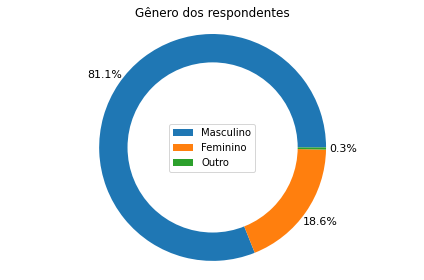

In [5]:
pie_chart(df, "('P1_b ', 'Genero')", "Gênero dos respondentes")


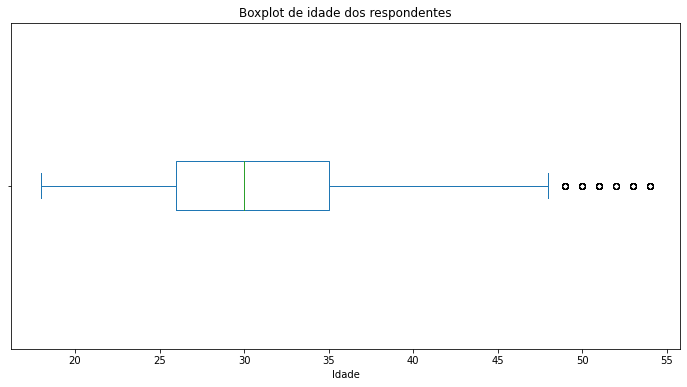

In [6]:
df["('P1_a ', 'Idade')"].plot(kind='box', figsize=(12,6), vert=False)
plt.title("Boxplot de idade dos respondentes")
plt.xlabel("Idade")
ax = plt.subplot()
ax.set_yticklabels('')
plt.show()

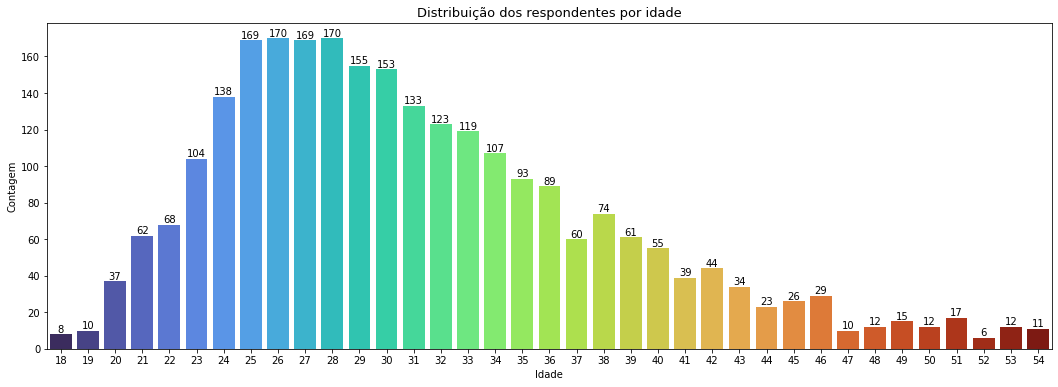

In [7]:
df_idade = df["('P1_a ', 'Idade')"].dropna().astype('int').reset_index()
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df_idade, x="('P1_a ', 'Idade')", palette='turbo')
ax.bar_label(ax.containers[0])
ax.set(xlabel="Idade",ylabel="Contagem")
ax.set_title('Distribuição dos respondentes por idade', fontsize=13);

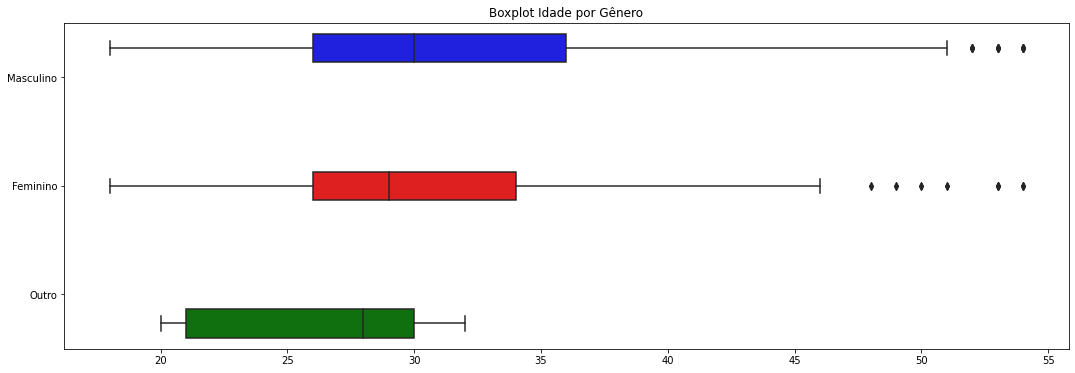

In [8]:
from matplotlib.pyplot import legend

fig = plt.figure(figsize=(18,6))
ax = sns.boxplot(data=df, x="('P1_a ', 'Idade')", y="('P1_b ', 'Genero')", hue="('P1_b ', 'Genero')", palette=['blue','red','green'], orient='h')
ax.set(xlabel="",ylabel="",title='Boxplot Idade por Gênero')
plt.legend([],[], frameon=False);

### Concentração de profissionais no Estado de São Paulo e na Região Sudeste

O Estado de São Paulo é o que apresenta a maior quantidade de respondentes (41,24%) seguido por Minas Gerais (13,07%) e Rio de Janeiro (8,51%). Além desses três estados, apenas Paraná (5,71%) e Rio Grande do Sul (5,21%) atingem participação superior a 5%.  
A Região Sudeste é a região que mais concentra profissionais (63,2%), seguido por Sul (15,1%), Nordeste (11,4%), Centro-Oeste (7,0%) e Norte (1,4%). Os profissionais atuantes no exterior somam 2,0%.

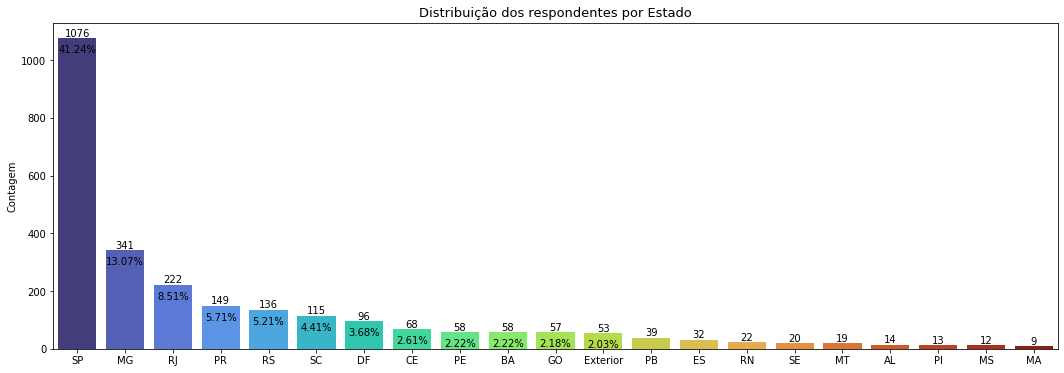

In [9]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x="('P1_e_a ', 'uf onde mora')", palette='turbo', order = df["('P1_e_a ', 'uf onde mora')"].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set(xlabel="",ylabel="Contagem")
ax.set_title('Distribuição dos respondentes por Estado', fontsize=13)

patches = ax.patches
percentage = df["('P1_e_a ', 'uf onde mora')"].value_counts()/df["('P1_e_a ', 'uf onde mora')"].value_counts().sum()*100
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()-50
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

plt.show();

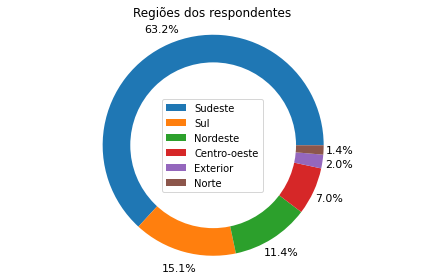

In [10]:
pie_chart(df, "('P1_e_b ', 'Regiao onde mora')", "Regiões dos respondentes");

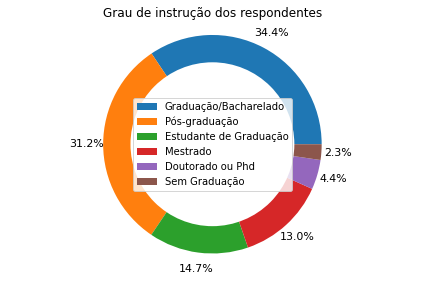

In [11]:
pie_chart(df, "('P1_h ', 'Nivel de Ensino')", "Grau de instrução dos respondentes");

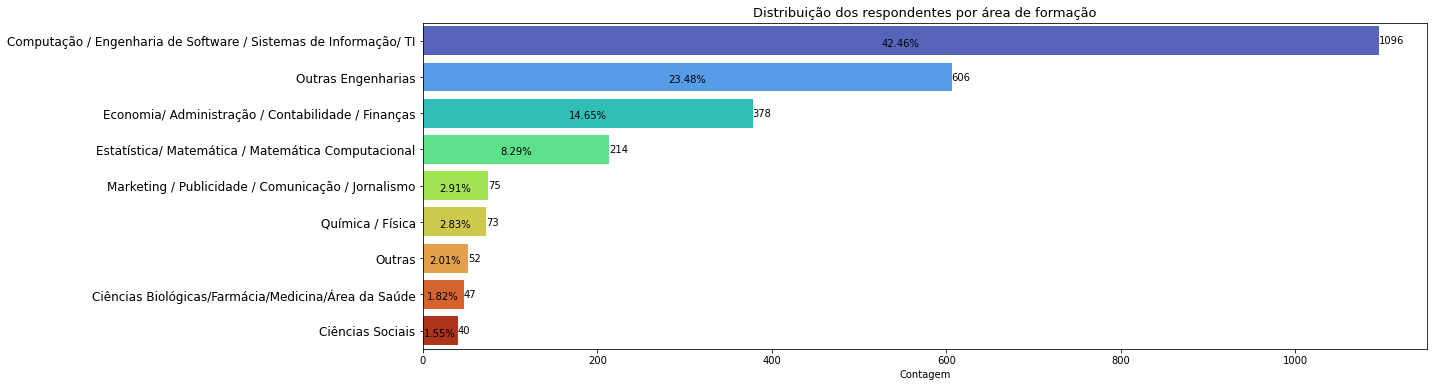

In [12]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, y="('P1_i ', 'Área de Formação')", palette='turbo', order = df["('P1_i ', 'Área de Formação')"].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set(xlabel="Contagem",ylabel="")
ax.set_yticklabels(df["('P1_i ', 'Área de Formação')"].value_counts().index, size = 12)
ax.set_title('Distribuição dos respondentes por área de formação', fontsize=13)

patches = ax.patches
percentage = df["('P1_i ', 'Área de Formação')"].value_counts()/df["('P1_i ', 'Área de Formação')"].value_counts().sum()*100
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width() / 2 - 0.05
   y = patches[i].get_y() + patches[i].get_height() - 0.25
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

plt.show();

## Parte 2: Perfil profissional dos respondentes
Nesta segunda parte da EDA, vamos caracterizar aspectos profissionais dos respondentes do questionário.
Algumas das perguntas que queremos responder são:
- Para quais indústrias os profissionais trabalham?
- Quais os vínculos empregatícios dos profissionais?
- Quais os cargos e níveis de senioridade desses profissionais?
- Em qual modelo de trabalho (presencial, remoto) esses profissionais atuam e qual dos modelos consideram o ideal?
- Quais as linguagens de programação mais utilizadas pelos profissionais?
- Quais as atividades mais comuns exercidas na rotina desses profissionais?

A maioria dos respondentes trabalha no setor de tecnologia e desenvolvimento de software (27,10%).  
Seguido pelo setor financeiro/bancário (16,41%).  
Os demais setores apresentaram percentual de participação menor do que 6%.

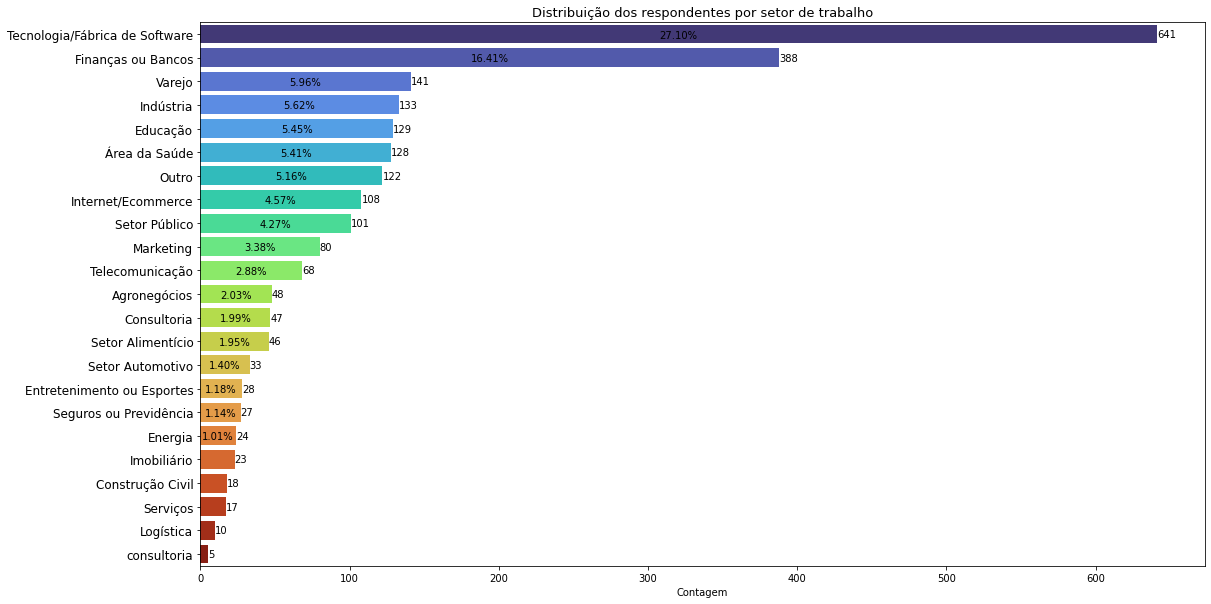

In [13]:
fig = plt.figure(figsize=(18,10))
ax = sns.countplot(data=df, y="('P2_b ', 'Setor')", palette='turbo', order = df["('P2_b ', 'Setor')"].value_counts().index, orient='h')
ax.bar_label(ax.containers[0])
ax.set(ylabel="",xlabel="Contagem")
ax.set_title('Distribuição dos respondentes por setor de trabalho', fontsize=13)
ax.set_yticklabels(df["('P2_b ', 'Setor')"].value_counts().index, size = 12)

patches = ax.patches
percentage = df["('P2_b ', 'Setor')"].value_counts()/df["('P2_b ', 'Setor')"].value_counts().sum()*100
for i in range(len(patches)-5):
   x = patches[i].get_x() + patches[i].get_width() / 2 - 0.05
   y = patches[i].get_y() + patches[i].get_height() - 0.25
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

plt.show();

O regime CLT é o mais comum entre os vínculos empregatícios dos profissionais.  
Interessante notar a grande diferença de participação dos profissionais do regime CLT (65,85%) para os demais.  
O regime com a segunda maior participação, empregados CNPJ, responde apenas com 8,61%.

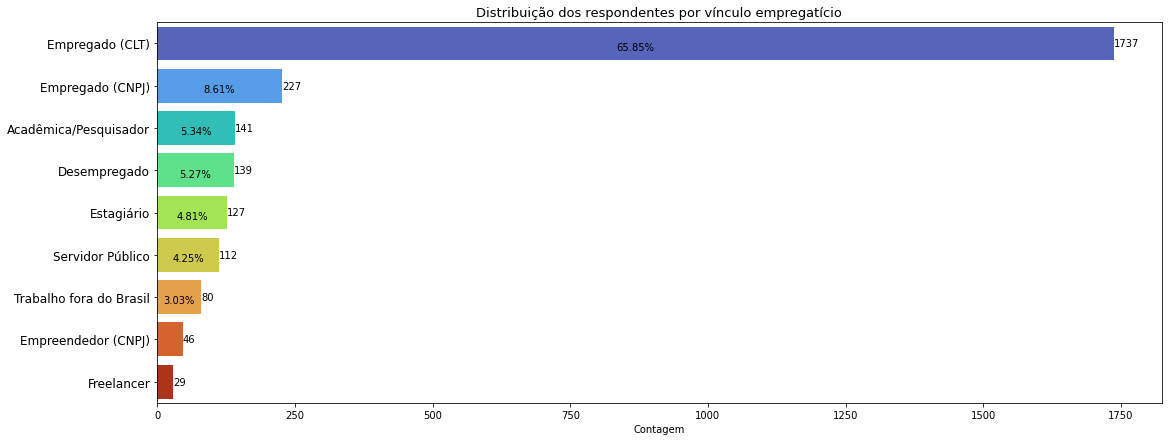

In [14]:
fig = plt.figure(figsize=(18,7))
ax = sns.countplot(data=df, y="Vínculo Empregatício", palette='turbo', order = df["Vínculo Empregatício"].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set(xlabel="Contagem",ylabel="")
ax.set_yticklabels(df["Vínculo Empregatício"].value_counts().index, size = 12)
ax.set_title('Distribuição dos respondentes por vínculo empregatício', fontsize=13)

patches = ax.patches
percentage = df["Vínculo Empregatício"].value_counts()/df["Vínculo Empregatício"].value_counts().sum()*100
for i in range(len(patches)-2):
   x = patches[i].get_x() + patches[i].get_width() / 2 - 0.05
   y = patches[i].get_y() + patches[i].get_height() - 0.25
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

plt.show();

Essa alta concentração de profissionais CLT fica evidente no gráfico de scatter abaixo.  
Observando o boxplot de idade por vínculo empregatício, temos que todas as categorias apresentam mediana inferior a 40 anos.  
Estagiários são o grupo de profissionais mais jovens.  
Acadêmicos/pesquisadores e desempregados são grupos de faixa etária mais elevada, sendo a mediana dos desempregados a mais alta entre todas as categorias (38 anos).

In [15]:
fig = px.scatter(tamanho, x="('P1_a ', 'Idade')", y="Vínculo Empregatício", color="Tamanho",size="Tamanho",size_max=35,color_continuous_scale= "Turbo",labels={"('P1_a ', 'Idade')":"Idade","Tamanho":"Quantidade"}, title="Concentração de quantidade de respondentes por vínculo empregatício")
fig.show()

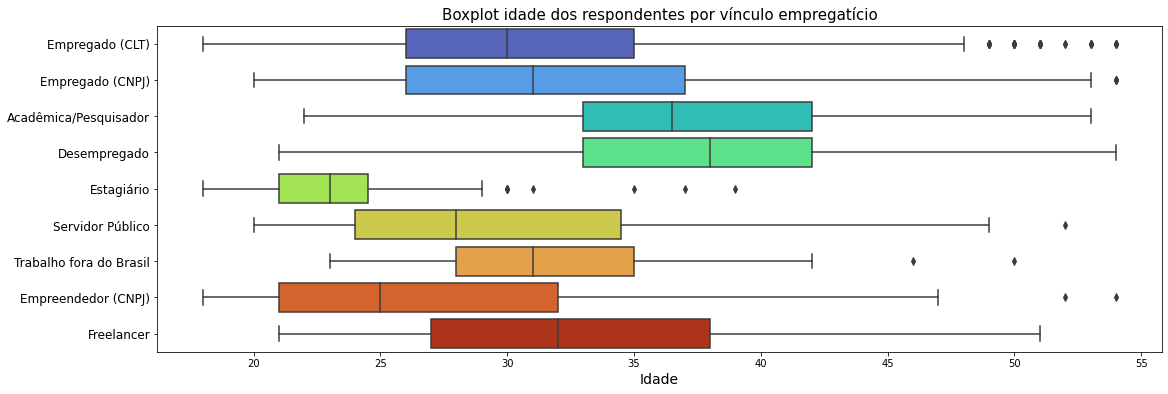

In [16]:
fig = plt.figure(figsize=(18,6))
ax=sns.boxplot(data=df,x="('P1_a ', 'Idade')",y="Vínculo Empregatício", palette='turbo')
ax.set_title('Boxplot idade dos respondentes por vínculo empregatício', fontsize=15)
ax.set_xlabel('Idade', fontsize=14)
ax.set_ylabel('')
ax.set_yticklabels(df["Vínculo Empregatício"].value_counts().index, size = 12);

No gráfico de barras a seguir, observamos a distribuição dos respondentes pelo título nominal do cargo que ocupam.  
Em primeiro lugar aparece Cientista de Dados como cargo com mais menções (19,22%), seguido por Analista de BI (18,20%), Analista de Dados (17,45%) e Engenheiro de Dados (16,16%).

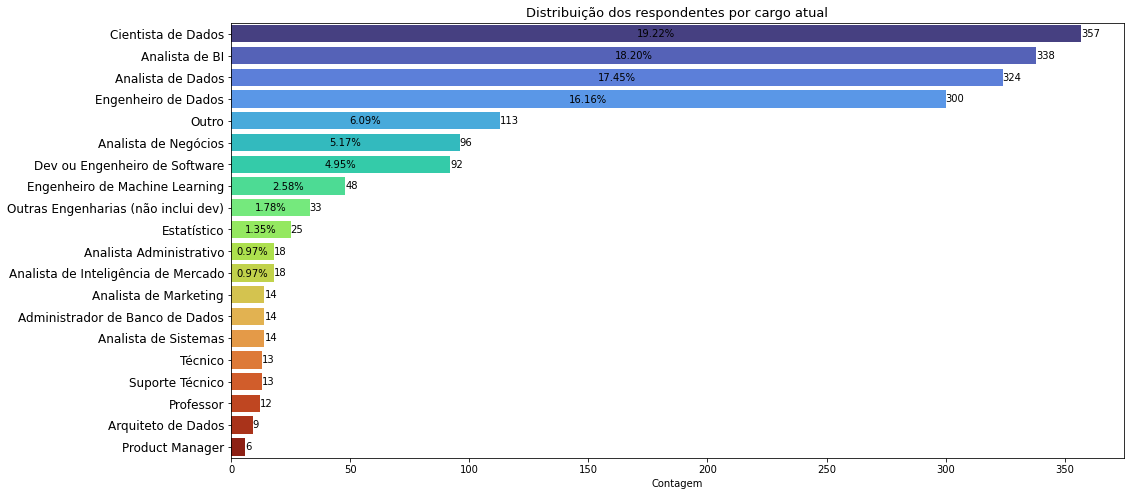

In [17]:
fig = plt.figure(figsize=(16,8))
ax = sns.countplot(data=df, y="('P2_f ', 'Cargo Atual')", palette='turbo', order = df["('P2_f ', 'Cargo Atual')"].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set(xlabel="Contagem",ylabel="")
ax.set_title('Distribuição dos respondentes por cargo atual', fontsize=13)
ax.set_yticklabels(df["('P2_f ', 'Cargo Atual')"].value_counts().index, size = 12)

patches = ax.patches
percentage = df["('P2_f ', 'Cargo Atual')"].value_counts()/df["('P2_f ', 'Cargo Atual')"].value_counts().sum()*100
for i in range(len(patches)-8):
   x = patches[i].get_x() + patches[i].get_width() / 2 - 0.05
   y = patches[i].get_y() + patches[i].get_height() - 0.25
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

plt.show();

Os respondentes que ocupam cargos técnicos de dados (excluindo cargos como os de gestão) foram agrupados em três grandes categorias ("Analista de Dados", "Cientista de Dados" e "Engenheiro de Dados"). A maioria dos respondentes se declara como Analista de Dados (51,0%), seguido por Cientista de Dados (24,7%) e Engenheiro de Dados (24,3%).

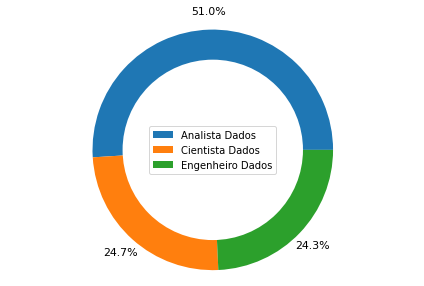

In [18]:
pie_chart(df, 'profissao', "")

Quanto ao grau de senioridade, os respondentes se distribuem quase que de forma homogênea.

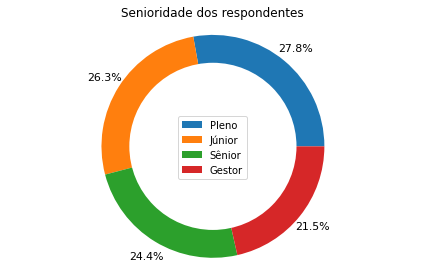

In [19]:
pie_chart(df, "('P2_g ', 'Nivel')", "Senioridade dos respondentes")

O modelo de trabalho prevalecente é o remoto, e o modelo preferido é o híbrido flexível.  
O modelo de trabalho menos desejado é o presencial, independente da forma atual de trabalho.

In [20]:
fig = px.sunburst(df[df["('P2_r ', 'Qual a forma de trabalho ideal para você?')"]!="ignore"], path=["('P2_q ', 'Atualmente qual a sua forma de trabalho?')", "('P2_r ', 'Qual a forma de trabalho ideal para você?')"], color_discrete_sequence=['#4584f9', '#1ae4b6', '#a1fc3d', '#f9ba38', '#e5460a'], title='Forma de trabalho real vs. ideal')
fig.update_traces(textinfo="percent entry+label")
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
    font=dict(
        family="Courier New, monospace",
        size=18),
    title={
        'y':0.9,
        'x':0.05,
        'xanchor': 'left',
        'yanchor': 'top'})
fig.show()

Python e SQL são as linguagens de programação mais utilizadas pelos respondentes (39,63% e 39,36% respectivamente).  
As duas linguagens somam conjuntamente 78,99% dentre as liguagens mais utilizadas.

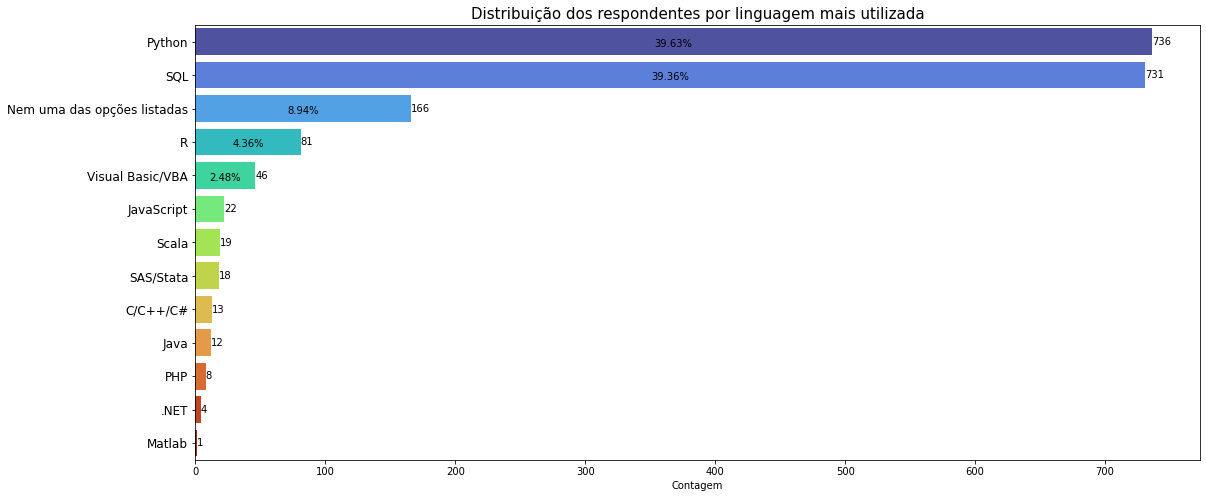

In [21]:
fig = plt.figure(figsize=(18,8))
ax = sns.countplot(data=df, y="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", palette='turbo', order = df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().index, orient='h')
ax.bar_label(ax.containers[0])
ax.set(ylabel="",xlabel="Contagem")
ax.set_title('Distribuição dos respondentes por linguagem mais utilizada', fontsize=15)
ax.set_yticklabels(df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().index, size = 12)

patches = ax.patches
percentage = df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts()/df["('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')"].value_counts().sum()*100
for i in range(len(patches)-8):
   x = patches[i].get_x() + patches[i].get_width() / 2 - 0.05
   y = patches[i].get_y() + patches[i].get_height() - 0.25
   ax.annotate('{:.2f}%'.format(percentage[i]), (x, y), ha='center')

plt.show()

In [22]:
fig =px.histogram(prof_lang_cross_melt, y='value',barnorm='percent',color="('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", x='profissao', color_discrete_sequence= px.colors.sequential.Turbo,labels={"('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')":"","profissao":"Profissão"},text_auto='.0f')
fig.update_layout(title={"text": "Linguagens mais utilizadas por profissão", "x": 0.5}, yaxis_title="Percent")
fig.update_traces(marker_line_width=0)
fig.show()

As três principais atividades exercidas pelos cientistas de dados, independentemente da senioridade, são Coleta e limpeza de dados, Contato com os times de negócio e Desenvolvimento de modelos de Machine Learning.  
Conforme o nível de senioridade aumenta, nota-se que diminui a proporção da coleta e da limpeza de dados e aumenta a do contato com os times de negócio.

In [23]:
fig =px.histogram(df_atividade_melt_sg, y='value', color="variable", x="('P2_g ', 'Nivel')",barnorm='percent',text_auto='.0f', color_discrete_sequence= px.colors.sequential.Turbo, barmode='relative',labels={"variable":"","('P2_g ', 'Nivel')":"Nível"})
fig.update_layout(title={"text": "Cientista de Dados: Atividade em que se gasta mais tempo", "x": 0.5}, yaxis_title="Percent")
fig.show()

In [24]:
fig =px.histogram(atv, y='x', color="index", x=0, barnorm='percent',text_auto='.01f', color_discrete_sequence= px.colors.sequential.Turbo, barmode='relative',labels={"index":"","x":"", "x":""}, height=550)
fig.update_layout(title={"text": "Atividades que compõe a rotina de trabalho do cientista de dados", "x": 0.5}, xaxis_title="%")
#fig.update_traces(width=30)
fig.update_layout(legend_orientation='h')

fig.show()

## Parte 3: perfil salarial dos respondentes

Nesta terceira parte da EDA, vamos caracterizar aspectos salariais dos respondentes do questionário.
Algumas das perguntas que queremos responder são:
- Como é a distribuição pelas faixas de salário?
- Como as distribuições das faixas salariais variam em função de profissão, região, gênero, vínculo empregatício, senioridade e experiência?

### Histograma de distribuição salarial
* A maior concentração está na faixa R$ 8k-12k (moda 479 ocorrências), o histograma é unimodal
* As categorias mínima e máxima respondem pelas menores ocorrências (32 e 34 respectivamente)
* A mediana está à esquerda da moda (distribuição deslocada à esquerda)

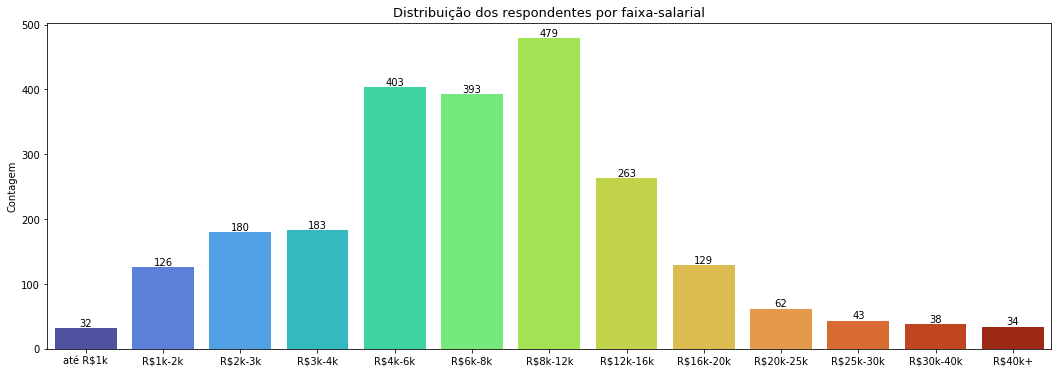

In [25]:
fig = plt.figure(figsize=(18,6))
ax = sns.countplot(data=df, x="('P2_h ', 'Faixa salarial')", palette='turbo')
ax.bar_label(ax.containers[0])
ax.set(xlabel="",ylabel="Contagem")
ax.set_title('Distribuição dos respondentes por faixa-salarial', fontsize=13)

plt.show()

Proporcionalmente, o Engenheiro de Dados apresenta ganhos nas faixas superiores mais frequentes do que o Cientista de Dados que, por sua vez, possui ganhos superiores mais frequentes do que o Analista de Dados.  
A faixa salarial mais frequente do Cientista de dados é R$8k-12k, e 5% dos Cientistas de dados estão na faixa acima de R$20k.

In [26]:
fig =px.histogram(prof_sal_cross_melt, y='value',barnorm='percent',color="salario", x='profissao', color_discrete_sequence= px.colors.sequential.Turbo,labels={"salario":"","profissao":"Profissão"},text_auto='.0f')
fig.update_layout(title={"text": "Distribuição do Salário por Profissão", "x": 0.5}, yaxis_title="Percent")
fig.update_traces(marker_line_width=0)
fig.show()

No gráfico de linhas a seguir, a curva normalizada de ganhos por gênero demonstra uma certa disparidade de ganhos entre homens e mulheres, sendo que nas faixas de salários maiores (a partir de R$8k-12k), os homens têm representatividade maior.

In [27]:
sexo_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P1_b ', 'Genero')"],normalize='columns')*100

fig = px.line(sexo_prop.iloc[:,0:2], x=sexo_prop.index, y=sexo_prop.iloc[:,0:2].columns, markers=True, title="Proporções de faixas-salariais por gênero",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P1_b ', 'Genero')": ""
                 }, color_discrete_sequence=['Red','Blue','Black'])
                
fig.show()

Os profissionais que atuam fora do Brasil apresentam uma moda elevada na faixa de R$30k-40k.  
O empreendedor CNPJ também apresenta uma moda elevada, na faixa de R$16k-20k.
Os empregados CLT e os CNPJ apresentam distribuições salariais semelhantes.

In [28]:
salary_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df['Vínculo Empregatício'],normalize='columns')*100

fig = px.line(salary_prop, x=salary_prop.index, y=salary_prop.columns, markers=True, title="Proporções de faixas-salariais por tipo vínculo empregatício",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "Vínculo Empregatício": ""
                 }, color_discrete_sequence=['#30123b', '#4584f9', '#1ae4b6', '#a1fc3d', '#f9ba38', '#e5460a', '#7a0402'])
fig.show()


Conforme expectativa, a distribuição salarial tende a refletir o nível de senioridade do profissional.

In [29]:
nivel_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P2_g ', 'Nivel')"],normalize='columns')*100

fig = px.line(nivel_prop, x=nivel_prop.index, y=nivel_prop.columns, markers=True,title="Proporções de faixas-salariais por nível de senioridade",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P2_g ', 'Nivel')": ""
                 }, color_discrete_sequence=['#30123b', '#1ae4b6', '#f9ba38', '#7a0402'])
                

fig.show()

In [30]:
nivel_sal = df.pivot_table(index=["('P2_h ', 'Faixa salarial')","('P2_g ', 'Nivel')"], values="('P0', 'id')", aggfunc='count').reset_index()
fig =px.histogram(nivel_sal, y="('P0', 'id')",barnorm='percent',color="('P2_h ', 'Faixa salarial')", x="('P2_g ', 'Nivel')",category_orders={"('P2_g ', 'Nivel')": ["Júnior","Pleno","Sênior","Gestor"]}, color_discrete_sequence= px.colors.sequential.Turbo,labels={"salario":"","profissao":"Profissão", "('P2_g ', 'Nivel')": "Nível", "('P2_h ', 'Faixa salarial')": "Faixa salarial"},text_auto='.0f')
fig.update_layout(title={"text": "Distribuição do Salário por Profissão", "x": 0.5}, yaxis_title="Percent")
fig.update_traces(marker_line_width=0)

fig.show()

In [31]:
experiencia_prop = pd.crosstab(df["('P2_h ', 'Faixa salarial')"],df["('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')"],normalize='columns')*100

fig = px.line(experiencia_prop, x=experiencia_prop.index, y=experiencia_prop.columns, markers=True, title="Proporções de faixas-salariais por tempo de experiência em Dados",
 labels={
                     "value": "Proporção",
                     "('P2_h ', 'Faixa salarial')": "Faixas salariais ",
                     "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": ""
                 }, color_discrete_sequence=['#30123b', '#4584f9', '#1ae4b6', '#a1fc3d', '#f9ba38', '#e5460a', '#7a0402'])
                

fig.show()